In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
enc = OneHotEncoder()
X = ([[0], [1]])
enc.fit(X)

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [3]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'E:/Brain Tumor Detection/input/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128, 128, 3)):
        data.append(np.array(img))
        result.append(enc.transform([[0]]).toarray())

In [4]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r'E:/Brain Tumor Detection/input/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(enc.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size = 0.2, shuffle = True, random_state=0)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [9]:
y_train.shape

(111, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 26s 2s/step - loss: 17.7992 - val_loss: 86.0339
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 23.2995 - val_loss: 134.6465
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 9.2158 - val_loss: 29.6208
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 4.4987 - val_loss: 34.7320
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 5.6156 - val_loss: 11.3511
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 2.4924 - val_loss: 36.3254
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.8728 - val_loss: 43.3144
Epoch 8/30
3/3 [==============================] - 6s 2s/step - loss: 0.8355 - val_loss: 37.7331
Epoch 9/30
3/3 [==============================] - 6s 2s/step - loss: 1.1475 - val_loss: 28.0990
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 0.2382 - val_loss: 19.5845
Epoch 11/30
3/3 [==================

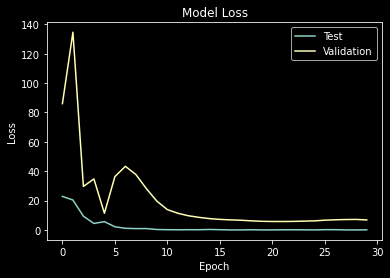

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [12]:
def names(num):
    if num == 0:
        return 'Yes, its a tumor'
    else:
        return 'No, its not a tumor'

99.99990463256836% Confidence No, its not a tumor


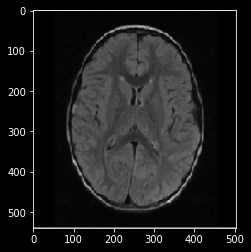

In [13]:
from matplotlib.pyplot import imshow
img = Image.open(r'E:/Brain Tumor Detection/input/no/no 89.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.99548196792603% Confidence Yes, its a tumor


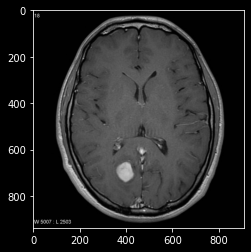

In [22]:
from matplotlib.pyplot import imshow
img = Image.open(r'E:/Brain Tumor Detection/blah4.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

In [ ]:
model.save('brainT.h5')